In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold

import warnings
warnings.simplefilter(action= 'ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [109]:
diabet_df= pd.read_csv('diabetes.csv')

In [110]:
diabet_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**EXPOLORATORY DATA ANALYSIS**

In [111]:
diabet_df.shape

(768, 9)

In [112]:
diabet_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [113]:
diabet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [114]:
diabet_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [115]:
diabet_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [116]:
diabet_df.Outcome.value_counts()*100/len(diabet_df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

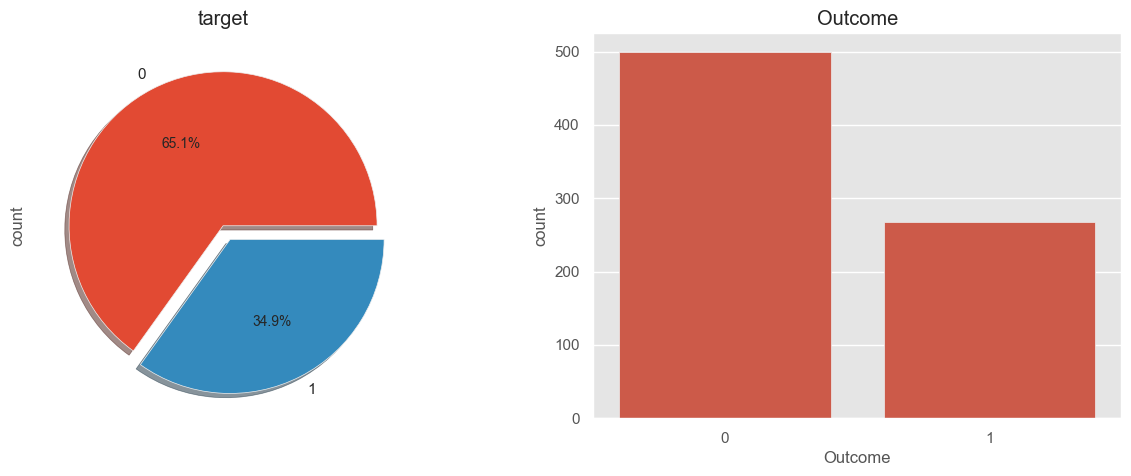

In [117]:
fig, ax= plt.subplots(1, 2, figsize=(15, 5))
diabet_df.Outcome.value_counts().plot.pie(explode=[0, 0.1], autopct= '%1.1f%%', ax= ax[0], shadow= True)
ax[0].set_title('target')
sns.countplot(data= diabet_df, x= 'Outcome', ax= ax[1])
ax[1].set_title('Outcome')
plt.show()

<Axes: xlabel='age', ylabel='count'>

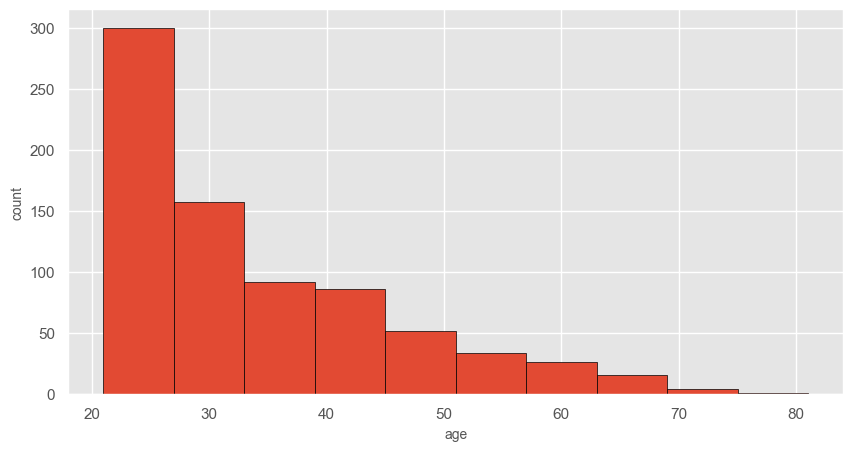

In [118]:
#plo t he histogtam
plt.figure(figsize=(10,5))#Age
plt.xlabel('age', fontsize= 10)
plt.ylabel('count', fontsize= 10)
diabet_df['Age'].hist(edgecolor= 'black')

In [119]:
print('max age is:'+str(diabet_df.Age.max()))
print('min age is:'+str(diabet_df.Age.min()))

max age is:81
min age is:21


In [120]:
diabet_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Density'>

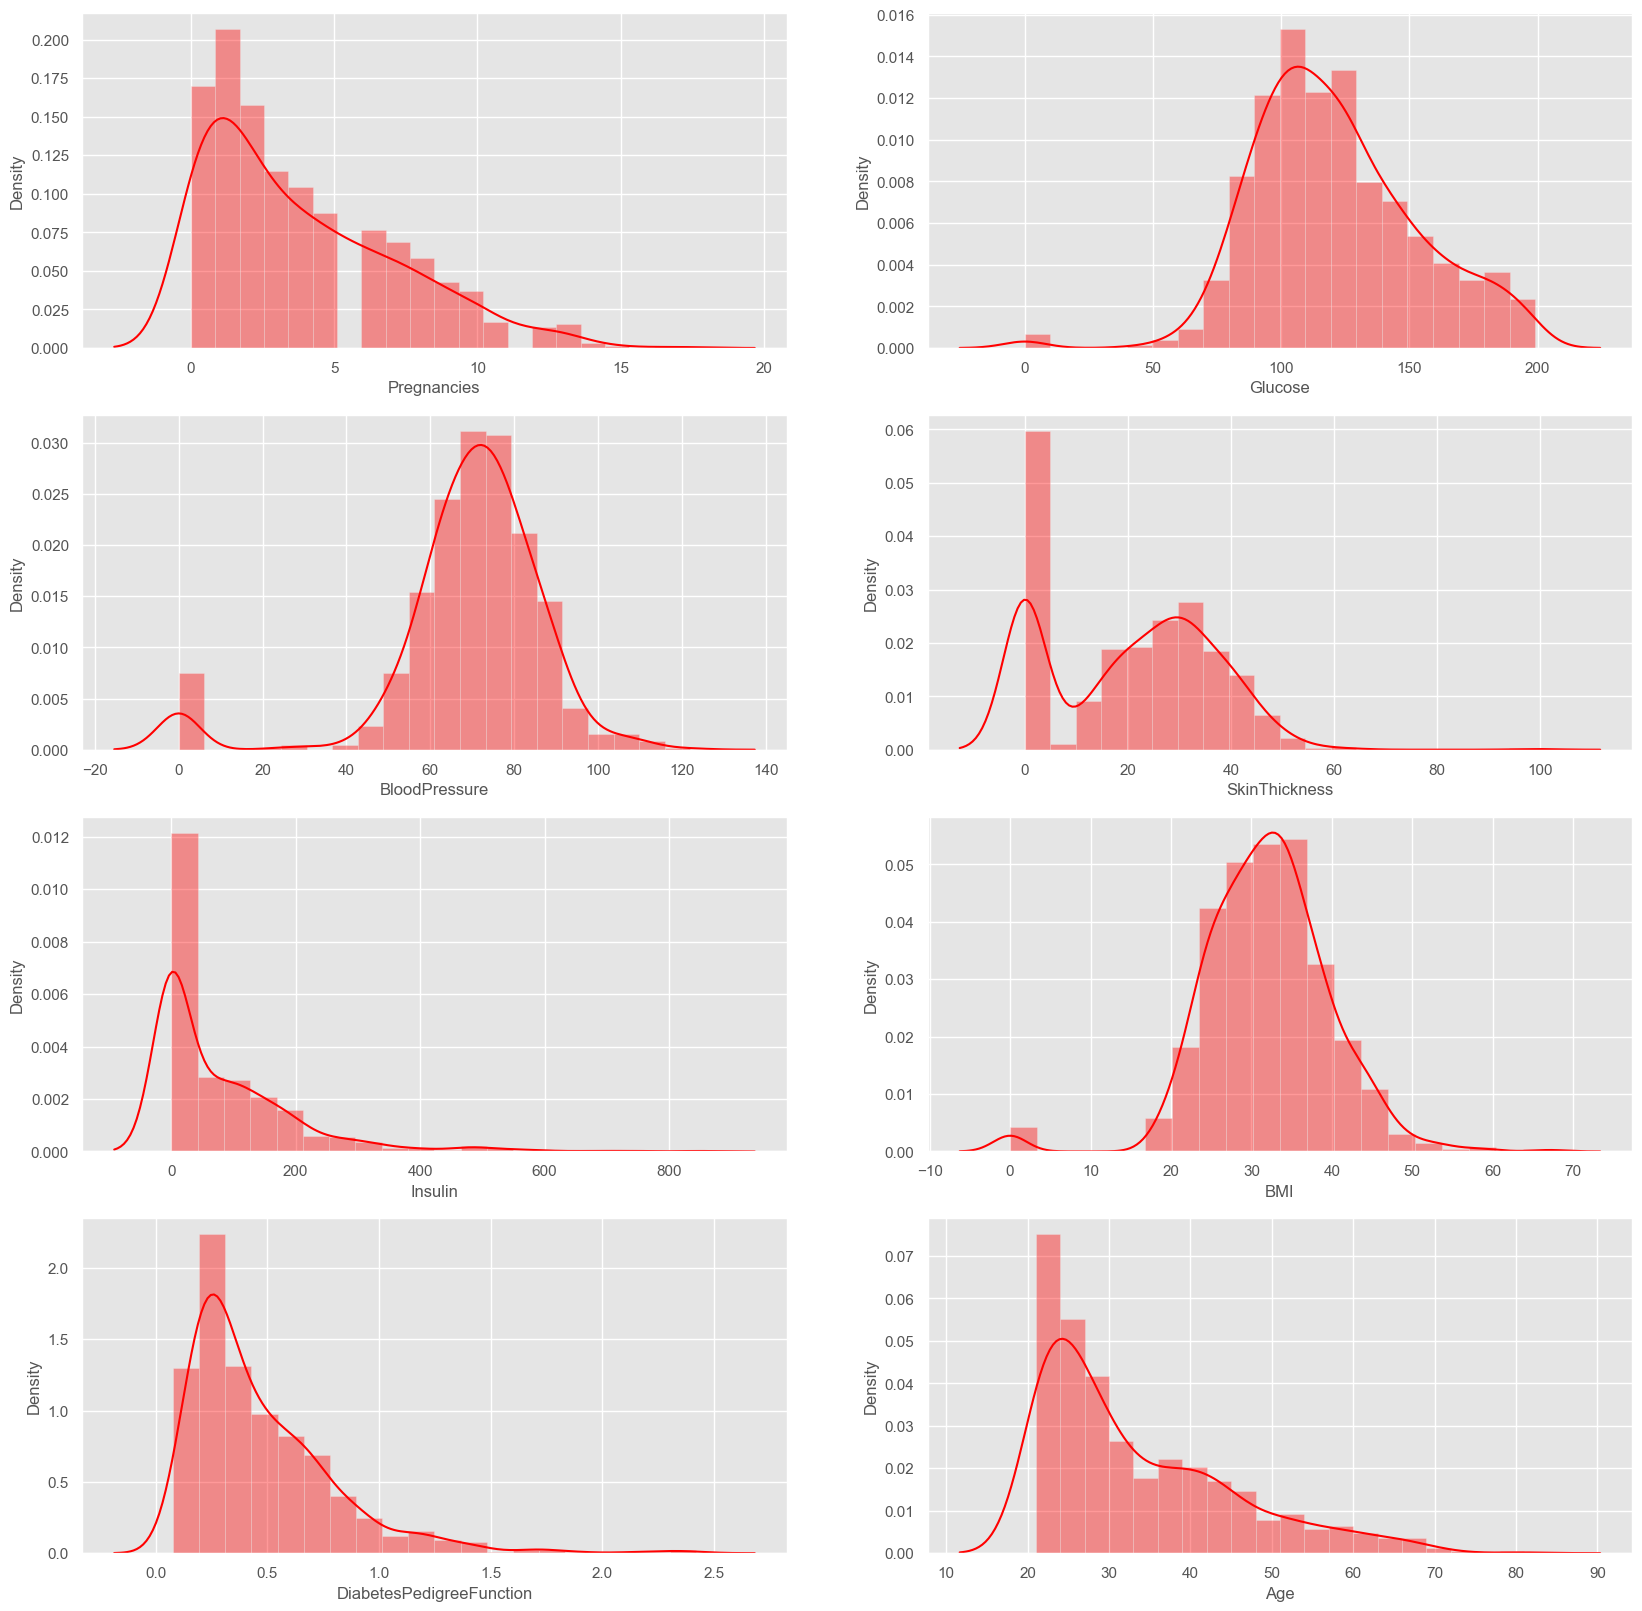

In [121]:
fig, ax= plt.subplots(4, 2, figsize= (20,20))
sns.distplot(diabet_df.Pregnancies, bins= 20, ax= ax[0,0], color= 'red')
sns.distplot(diabet_df.Glucose, bins= 20, ax= ax[0,1], color= 'red')
sns.distplot(diabet_df.BloodPressure, bins= 20, ax= ax[1,0], color= 'red')
sns.distplot(diabet_df.SkinThickness, bins= 20, ax= ax[1,1], color= 'red')
sns.distplot(diabet_df.Insulin, bins= 20, ax= ax[2,0], color= 'red')
sns.distplot(diabet_df.BMI, bins= 20, ax= ax[2,1], color= 'red')
sns.distplot(diabet_df.DiabetesPedigreeFunction, bins= 20, ax= ax[3,0], color= 'red')
sns.distplot(diabet_df.Age, bins= 20, ax= ax[3,1], color= 'red')

GROUPING BY OUTCOME FOR PREGNANCIES

In [122]:
diabet_df.groupby('Outcome').agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [123]:
diabet_df.groupby('Outcome').agg({'Pregnancies': 'max'})

,Pregnancies
Outcome,
0,13
1,17


GROUPING BY OUTCOME FOR GLUCOSE

In [124]:
diabet_df.groupby('Outcome').agg({'Glucose': 'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [125]:
diabet_df.groupby('Outcome').agg({'Glucose': 'max'})

,Glucose
Outcome,
0,197
1,199


GROUPING BY OUTCOME FOR BLOODPRESSURE

In [126]:
diabet_df.groupby('Outcome').agg({'BloodPressure': 'mean'})

,BloodPressure
Outcome,
0,68.184000
1,70.824627


In [127]:
diabet_df.groupby('Outcome').agg({'BloodPressure': 'max'})

,BloodPressure
Outcome,
0,122
1,114


GROUPING BY OUTCOME FOR SKIN THICKNESS

In [128]:
diabet_df.groupby('Outcome').agg({'SkinThickness': 'mean'})

,SkinThickness
Outcome,
0,19.664000
1,22.164179


In [129]:
diabet_df.groupby('Outcome').agg({'SkinThickness': 'max'})

,SkinThickness
Outcome,
0,60
1,99


GROUPING BY OUTCOME FOR INSULIN

In [130]:
diabet_df.groupby('Outcome').agg({'Insulin': 'mean'})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [131]:
diabet_df.groupby('Outcome').agg({'Insulin': 'max'})

,Insulin
Outcome,
0,744
1,846


GROUPING BY OUTCOME FOR BMI

In [132]:
diabet_df.groupby('Outcome').agg({'BMI': 'mean'})

,BMI
Outcome,
0,30.304200
1,35.142537


In [133]:
diabet_df.groupby('Outcome').agg({'BMI': 'max'})

,BMI
Outcome,
0,57.3
1,67.1


GROUPING BY OUTCOME FOR DIABETES PEDIGREE FUNCTION

In [134]:
diabet_df.groupby('Outcome').agg({'DiabetesPedigreeFunction': 'mean'})

,DiabetesPedigreeFunction
Outcome,
0,0.429734
1,0.550500


In [135]:
diabet_df.groupby('Outcome').agg({'DiabetesPedigreeFunction': 'max'})

,DiabetesPedigreeFunction
Outcome,
0,2.329
1,2.420


GROUPING BY OUTCOME FOR AGE

In [136]:
diabet_df.groupby('Outcome').agg({'Age': 'mean'})

,Age
Outcome,
0,31.190000
1,37.067164


In [137]:
diabet_df.groupby('Outcome').agg({'Age': 'max'})

,Age
Outcome,
0,81
1,70


In [138]:
diabet_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


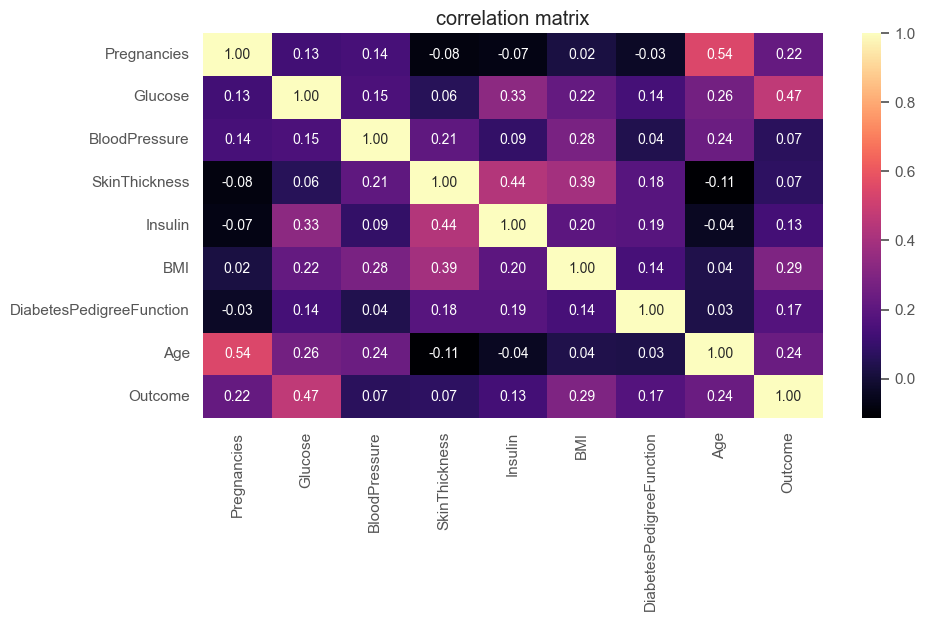

In [139]:
f,ax = plt.subplots(figsize=(10, 5))
sns.heatmap(diabet_df.corr(), annot= True, fmt= '.2f', ax= ax, cmap= 'magma')
ax.set_title('correlation matrix')
plt.show()

**DATA PRE-PROCESSING**

In [140]:
diabet_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [141]:
diabet_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = diabet_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [142]:
diabet_df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [143]:
diabet_df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [144]:
def mean_target(var):
    temp= diabet_df[diabet_df[var].notnull()]
    #print(temp)
    temp= temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].mean().reset_index()
    #print("******************************************************\n",temp)
    return temp

In [145]:
columns= diabet_df.columns
columns= columns.drop('Outcome')
for i in columns:
    #mean_target(i)
    diabet_df.loc[(diabet_df['Outcome']==0) & (diabet_df[i].isnull()), i]= mean_target(i)[i][0]
    diabet_df.loc[(diabet_df['Outcome']==1) & (diabet_df[i].isnull()), i]= mean_target(i)[i][1]

In [146]:
diabet_df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.000000,35.000000,206.846154,33.600000,0.627,50.0,1
1,1.000000,85.0,66.000000,29.000000,130.287879,26.600000,0.351,31.0,0
2,8.000000,183.0,64.000000,33.000000,206.846154,23.300000,0.672,32.0,1
3,1.000000,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0,0
4,5.669565,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0,1
5,5.000000,116.0,74.000000,27.235457,130.287879,25.600000,0.201,30.0,0
6,3.000000,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0,1
7,10.000000,115.0,70.877339,27.235457,130.287879,35.300000,0.134,29.0,0
8,2.000000,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0,1
9,8.000000,125.0,96.000000,33.000000,206.846154,35.406767,0.232,54.0,1


In [147]:
diabet_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

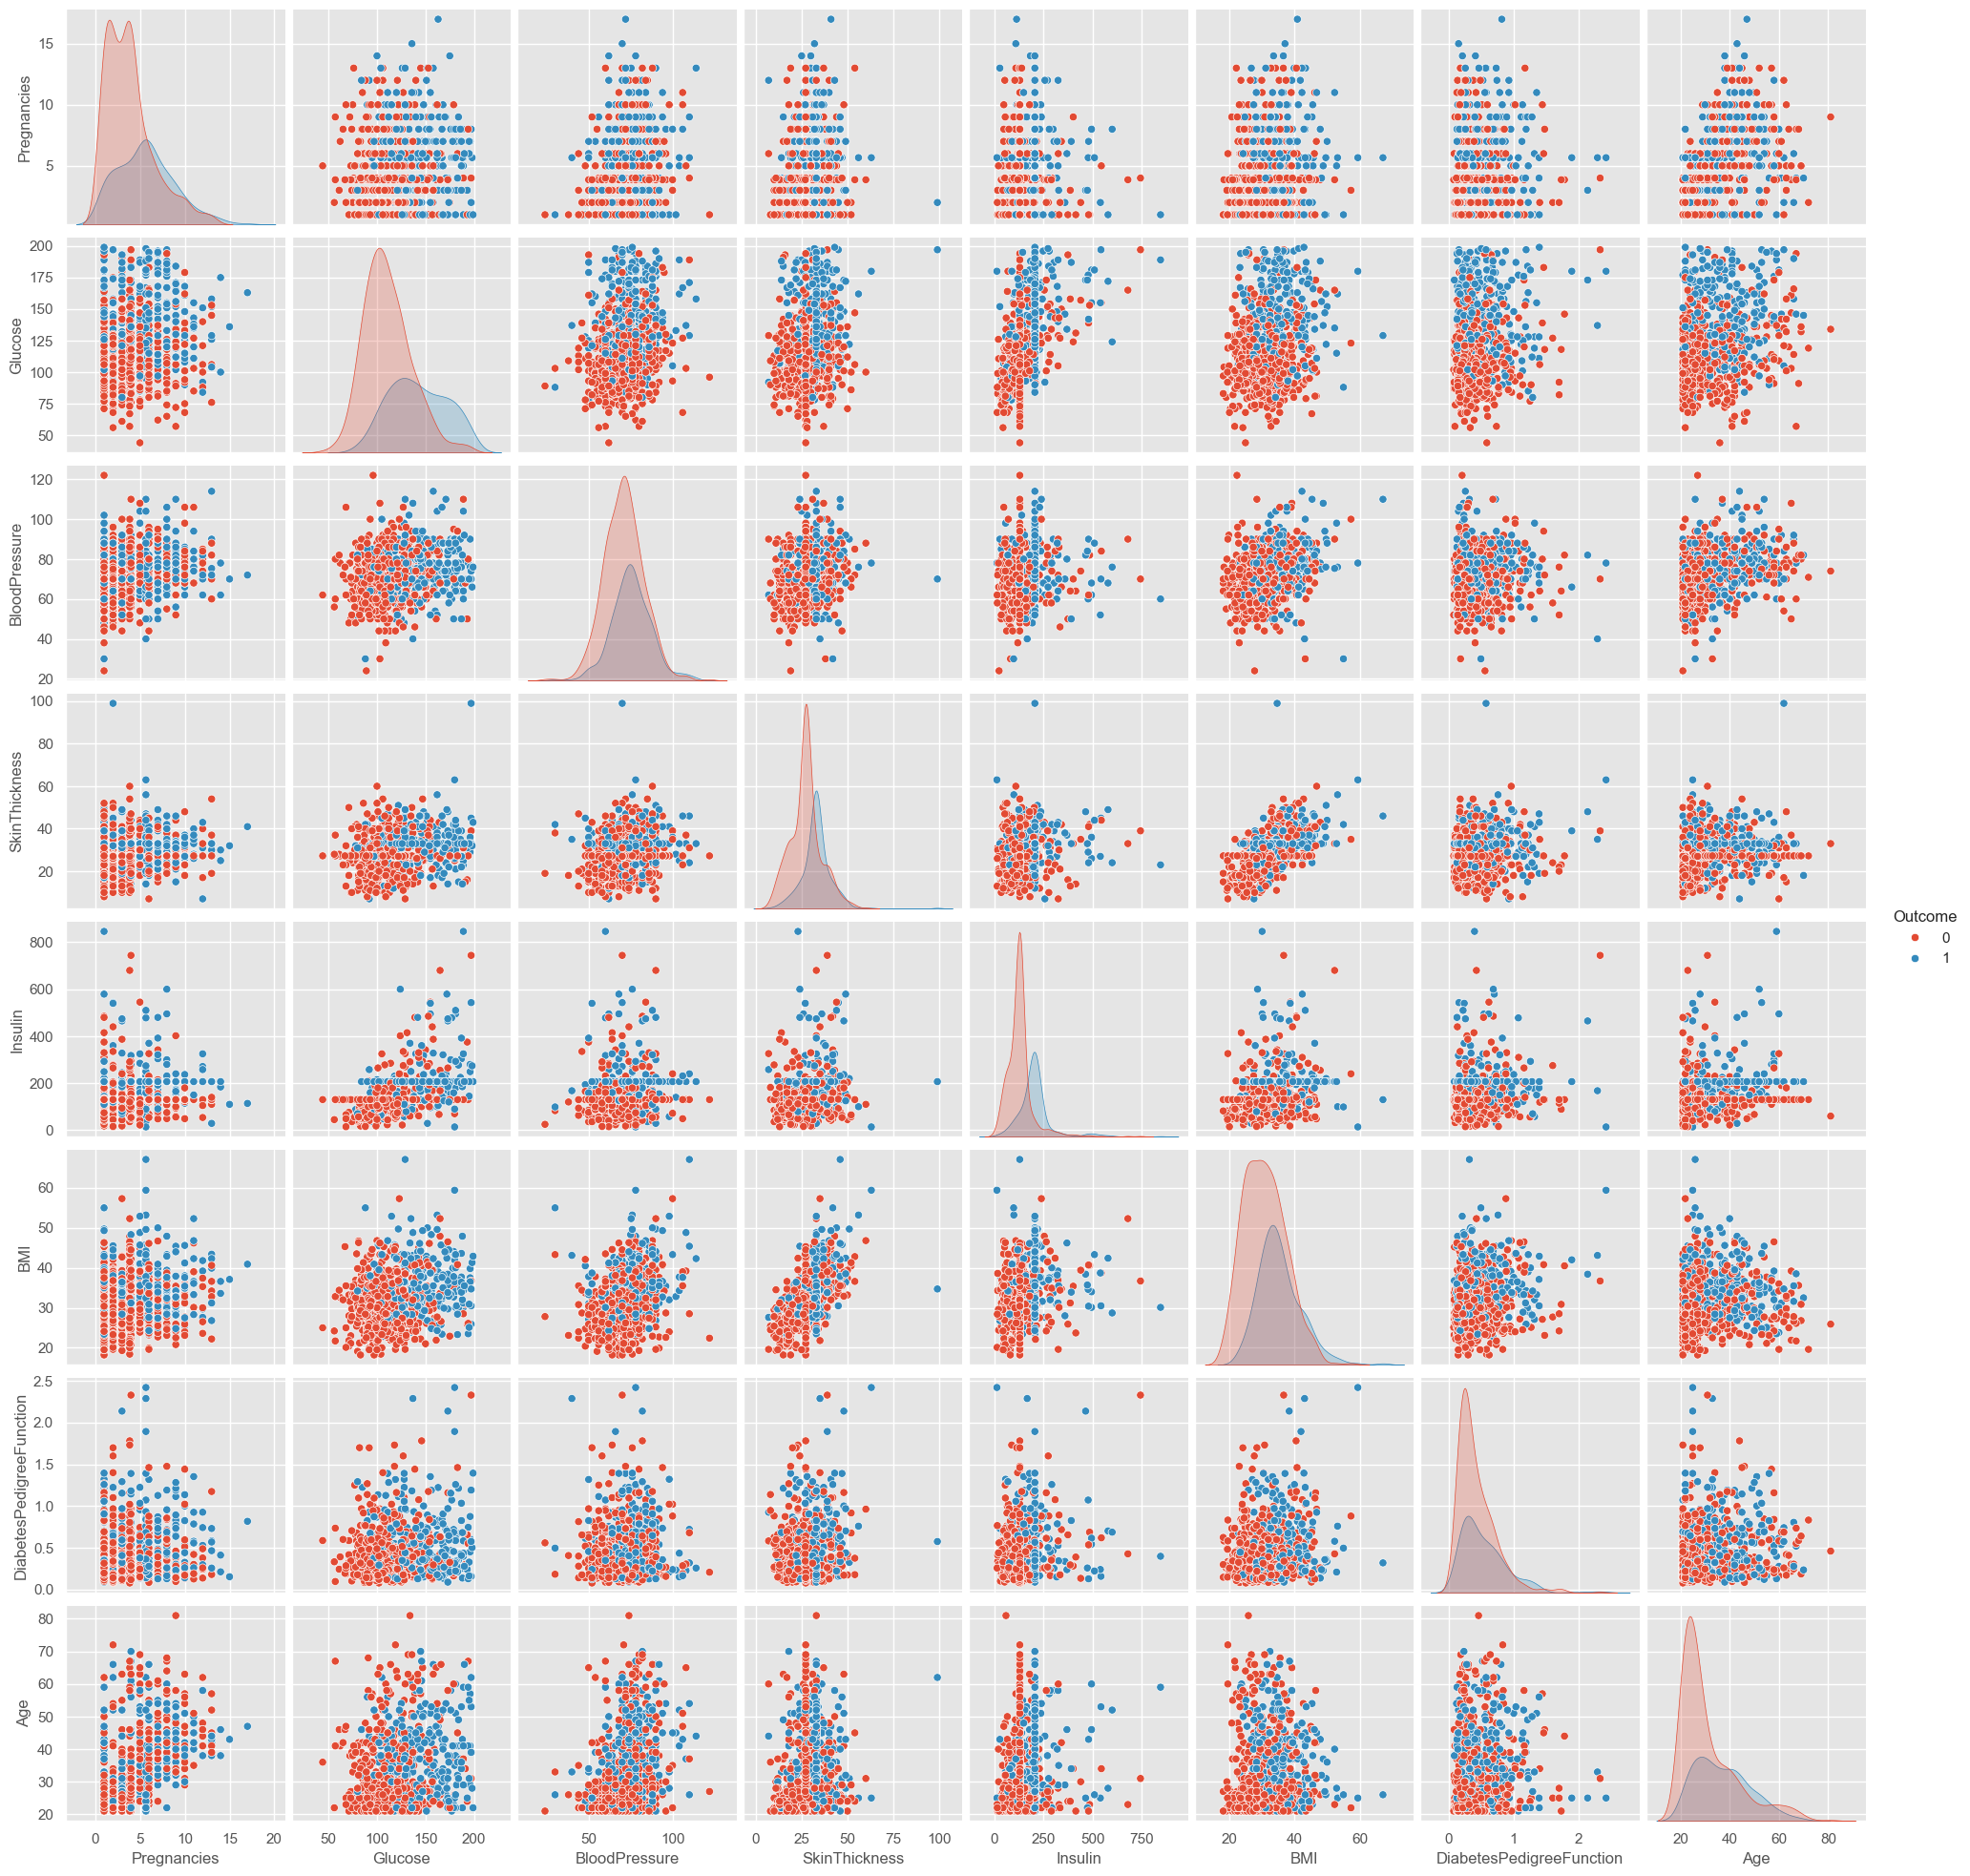

In [148]:
sns.pairplot(diabet_df, hue= 'Outcome')

<Axes: xlabel='Age'>

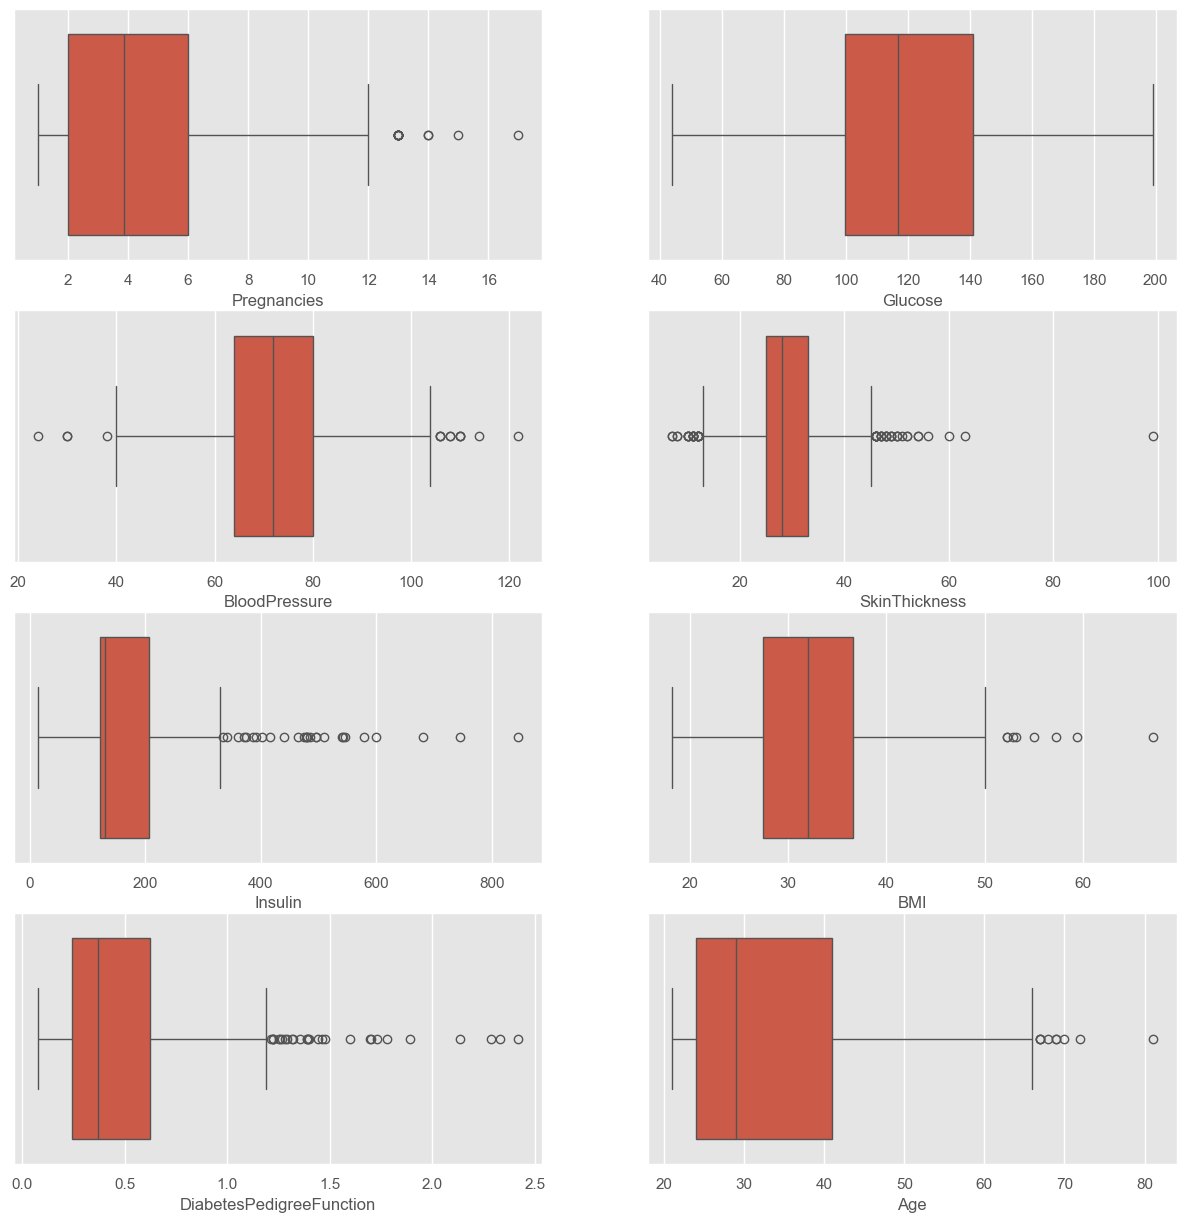

In [149]:
fig, ax= plt.subplots(4, 2, figsize= (15, 15))
sns.boxplot(diabet_df, x= 'Pregnancies', ax= ax[0, 0])
sns.boxplot(diabet_df, x= 'Glucose', ax= ax[0, 1])
sns.boxplot(diabet_df, x= 'BloodPressure', ax= ax[1, 0])
sns.boxplot(diabet_df, x= 'SkinThickness', ax= ax[1,1])
sns.boxplot(diabet_df, x= 'Insulin', ax= ax[2,0])
sns.boxplot(diabet_df, x= 'BMI', ax= ax[2,1])
sns.boxplot(diabet_df, x= 'DiabetesPedigreeFunction', ax= ax[3,0])
sns.boxplot(diabet_df, x= 'Age', ax= ax[3,1])

In [150]:
for feature in diabet_df:
    Q1 = diabet_df[feature].quantile(0.25)
    Q3 = diabet_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit= Q1 - 1.5*IQR
    upper_limit= Q3 + 1.5*IQR
    diabet_df.loc[diabet_df[feature]> upper_limit, feature]= upper_limit
    diabet_df.loc[diabet_df[feature]< lower_limit, feature]= lower_limit

<Axes: xlabel='Age'>

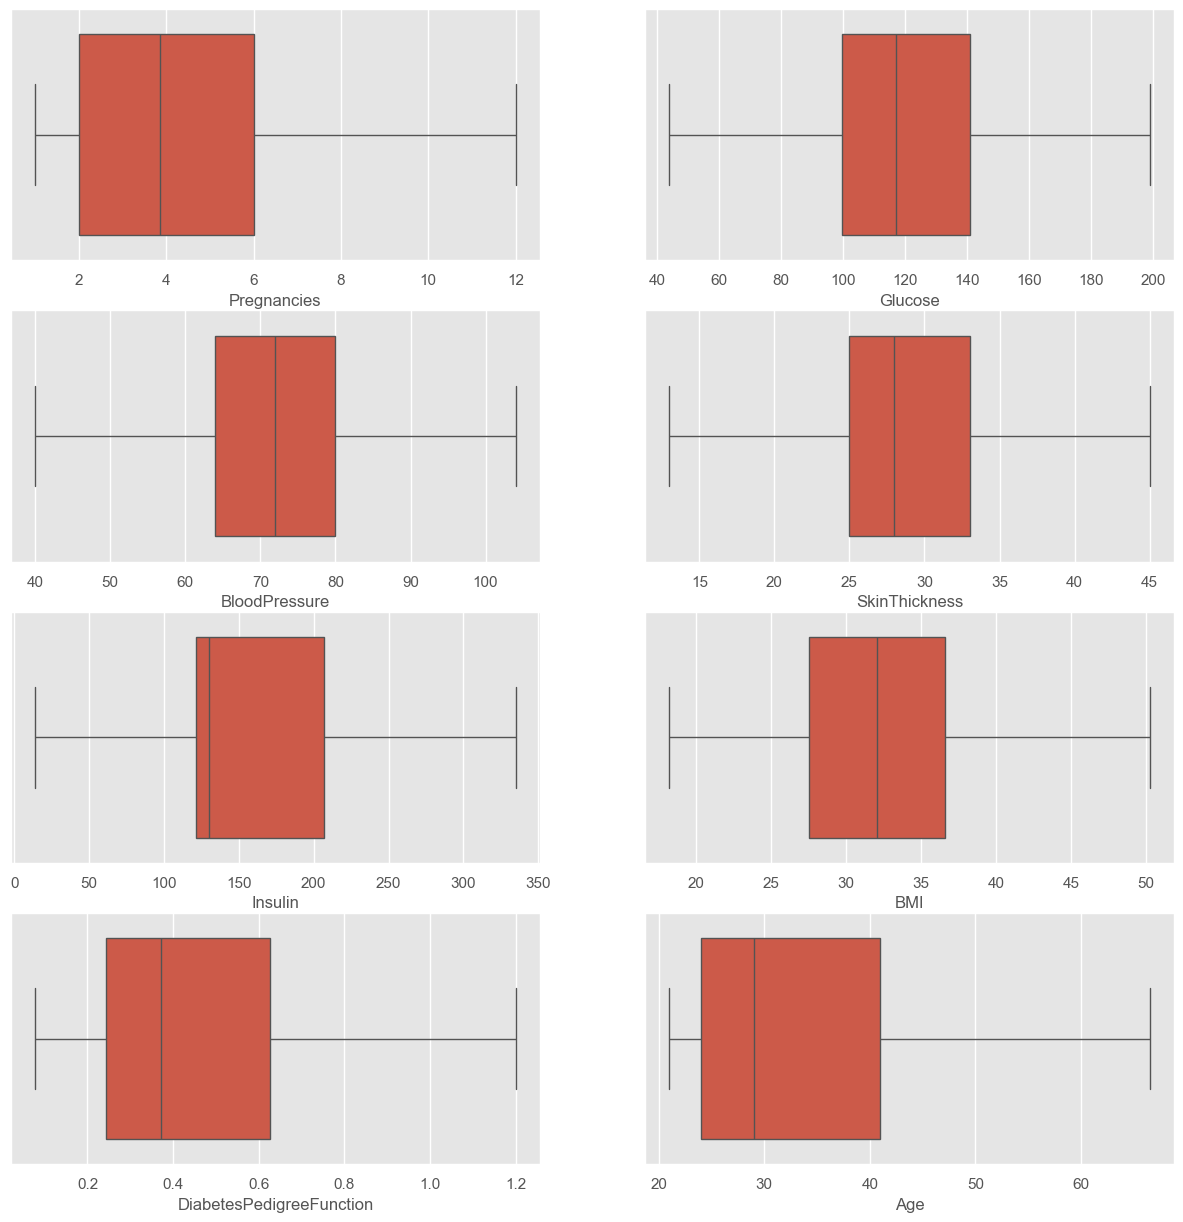

In [151]:
fig, ax= plt.subplots(4, 2, figsize= (15, 15))
sns.boxplot(diabet_df, x= 'Pregnancies', ax= ax[0, 0])
sns.boxplot(diabet_df, x= 'Glucose', ax= ax[0, 1])
sns.boxplot(diabet_df, x= 'BloodPressure', ax= ax[1, 0])
sns.boxplot(diabet_df, x= 'SkinThickness', ax= ax[1,1])
sns.boxplot(diabet_df, x= 'Insulin', ax= ax[2,0])
sns.boxplot(diabet_df, x= 'BMI', ax= ax[2,1])
sns.boxplot(diabet_df, x= 'DiabetesPedigreeFunction', ax= ax[3,0])
sns.boxplot(diabet_df, x= 'Age', ax= ax[3,1])

In [152]:
diabet_df.shape

(768, 9)

**FEATURE ENGINEERING**

In [153]:
bmi_values= pd.Series(['UnderWeight', 'Normal', 'OverWeight', 'Obesity 1', 'Obesity 2', 'Obesity 3'], dtype= 'category')
print(bmi_values)

0    UnderWeight
1         Normal
2     OverWeight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'OverWeight', 'UnderWeight']


In [154]:
diabet_df['BMI_Category']= bmi_values
diabet_df.loc[diabet_df.BMI<= 18.5, 'BMI_Category']= bmi_values[0]
diabet_df.loc[(diabet_df.BMI> 18.5) & (diabet_df.BMI<= 24.9), 'BMI_Category']= bmi_values[1]
diabet_df.loc[(diabet_df.BMI> 24.9) & (diabet_df.BMI<= 29.9), 'BMI_Category']= bmi_values[2]
diabet_df.loc[(diabet_df.BMI> 29.9) & (diabet_df.BMI<= 34.9), 'BMI_Category']= bmi_values[3]
diabet_df.loc[(diabet_df.BMI> 34.9) & (diabet_df.BMI<= 39.9), 'BMI_Category']= bmi_values[4]
diabet_df.loc[diabet_df.BMI> 39.9, 'BMI_Category']= bmi_values[5]

In [155]:
diabet_df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category
0,6.000000,148.0,72.0,35.000000,206.846154,33.6,0.627,50.0,1.0,Obesity 1
1,1.000000,85.0,66.0,29.000000,130.287879,26.6,0.351,31.0,0.0,OverWeight
2,8.000000,183.0,64.0,33.000000,206.846154,23.3,0.672,32.0,1.0,Normal
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0,OverWeight
4,5.669565,137.0,40.0,35.000000,168.000000,43.1,1.200,33.0,1.0,Obesity 3
5,5.000000,116.0,74.0,27.235457,130.287879,25.6,0.201,30.0,0.0,OverWeight
6,3.000000,78.0,50.0,32.000000,88.000000,31.0,0.248,26.0,1.0,Obesity 1


In [156]:
diabet_df['Insulin_Category']= pd.Series()
diabet_df.loc[(diabet_df.Insulin>= 16) & (diabet_df.Insulin<= 166), 'Insulin_Category']= 'Normal'
diabet_df.loc[(diabet_df.Insulin< 16) | (diabet_df.Insulin> 166), 'Insulin_Category']= 'Abnormal'

In [157]:
diabet_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Insulin_Category
0,6.000000,148.0,72.000000,35.000000,206.846154,33.600000,0.627,50.0,1.0,Obesity 1,Abnormal
1,1.000000,85.0,66.000000,29.000000,130.287879,26.600000,0.351,31.0,0.0,OverWeight,Normal
2,8.000000,183.0,64.000000,33.000000,206.846154,23.300000,0.672,32.0,1.0,Normal,Abnormal
3,1.000000,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0,0.0,OverWeight,Normal
4,5.669565,137.0,40.000000,35.000000,168.000000,43.100000,1.200,33.0,1.0,Obesity 3,Abnormal
5,5.000000,116.0,74.000000,27.235457,130.287879,25.600000,0.201,30.0,0.0,OverWeight,Normal
6,3.000000,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0,1.0,Obesity 1,Normal
7,10.000000,115.0,70.877339,27.235457,130.287879,35.300000,0.134,29.0,0.0,Obesity 2,Normal
8,2.000000,197.0,70.000000,45.000000,334.865385,30.500000,0.158,53.0,1.0,Obesity 1,Abnormal
9,8.000000,125.0,96.000000,33.000000,206.846154,35.406767,0.232,54.0,1.0,Obesity 2,Abnormal


In [158]:
BloodPressure_values= pd.Series(['Low', 'Normal', 'HyperTension stage1', 'HyperTension stage2', 'HyperTension Crisis'], dtype= 'category')
diabet_df['BloodPressure_Category']= BloodPressure_values
diabet_df.loc[diabet_df.BloodPressure< 60, 'BloodPressure_Category']= BloodPressure_values[0]
diabet_df.loc[(diabet_df.BloodPressure>= 60) & (diabet_df.BloodPressure< 80), 'BloodPressure_Category']= BloodPressure_values[1]
diabet_df.loc[(diabet_df.BloodPressure>= 80) & (diabet_df.BloodPressure< 89), 'BloodPressure_Category']= BloodPressure_values[2]
diabet_df.loc[(diabet_df.BloodPressure>= 89) & (diabet_df.BloodPressure< 120), 'BloodPressure_Category']= BloodPressure_values[3]
diabet_df.loc[diabet_df.BloodPressure>= 120, 'BloodPressure_Category']= BloodPressure_values[4]

In [159]:
diabet_df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Insulin_Category,BloodPressure_Category
7,10.0,115.0,70.877339,27.235457,130.287879,35.3,0.134,29.0,0.0,Obesity 2,Normal,Normal
305,2.0,120.0,76.000000,37.000000,105.000000,39.7,0.215,29.0,0.0,Obesity 2,Normal,Normal
68,1.0,95.0,66.000000,13.000000,38.000000,19.6,0.334,25.0,0.0,Normal,Normal,Normal
183,5.0,73.0,60.000000,27.235457,130.287879,26.8,0.268,27.0,0.0,OverWeight,Normal,Normal
118,4.0,97.0,60.000000,23.000000,130.287879,28.2,0.443,22.0,0.0,OverWeight,Normal,Normal


In [160]:
age_values= pd.Series(['Child', 'Young Adults', 'Middle Aged', 'Old aged'], dtype= 'category')
diabet_df['Age_Category']= age_values
diabet_df.loc[diabet_df.Age<= 16, 'Age_Category']= age_values[0]
diabet_df.loc[(diabet_df.Age> 16) & (diabet_df.Age<= 30), 'Age_Category']= age_values[1]
diabet_df.loc[(diabet_df.Age> 30) & (diabet_df.Age<= 45), 'Age_Category']= age_values[2]
diabet_df.loc[diabet_df.Age> 45, 'Age_Category']= age_values[3]

In [161]:
diabet_df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Insulin_Category,BloodPressure_Category,Age_Category
64,7.0,114.0,66.000000,33.000000,206.846154,32.8,0.258,42.0,1.0,Obesity 1,Abnormal,Normal,Middle Aged
763,10.0,101.0,76.000000,45.000000,180.000000,32.9,0.171,63.0,0.0,Obesity 1,Abnormal,Normal,Old aged
227,3.0,162.0,52.000000,38.000000,206.846154,37.2,0.652,24.0,1.0,Obesity 2,Abnormal,Low,Young Adults
222,7.0,119.0,70.877339,27.235457,130.287879,25.2,0.209,37.0,0.0,OverWeight,Normal,Normal,Middle Aged
338,9.0,152.0,78.000000,34.000000,171.000000,34.2,0.893,33.0,1.0,Obesity 1,Abnormal,Normal,Middle Aged


In [162]:
diabet_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BMI_Category                0
Insulin_Category            0
BloodPressure_Category      0
Age_Category                0
dtype: int64

In [163]:
diabet_df.shape

(768, 13)

In [164]:
diabet_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'BMI_Category',
       'Insulin_Category', 'BloodPressure_Category', 'Age_Category'],
      dtype='object')

One Hot Encoding

In [165]:
diabet_df= pd.get_dummies(diabet_df, columns= ['BMI_Category', 'Insulin_Category', 'BloodPressure_Category', 'Age_Category'], drop_first= True)

In [166]:
bool_cols= diabet_df.select_dtypes(include= bool)
diabet_df[bool_cols.columns]= bool_cols.astype(int)

In [167]:
diabet_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category_Obesity 1,...,BMI_Category_OverWeight,BMI_Category_UnderWeight,Insulin_Category_Normal,BloodPressure_Category_HyperTension stage1,BloodPressure_Category_HyperTension stage2,BloodPressure_Category_Low,BloodPressure_Category_Normal,Age_Category_Middle Aged,Age_Category_Old aged,Age_Category_Young Adults
0,6.000000,148.0,72.0,35.0,206.846154,33.6,0.627,50.0,1.0,1,...,0,0,0,0,0,0,1,0,1,0
1,1.000000,85.0,66.0,29.0,130.287879,26.6,0.351,31.0,0.0,0,...,1,0,1,0,0,0,1,1,0,0
2,8.000000,183.0,64.0,33.0,206.846154,23.3,0.672,32.0,1.0,0,...,0,0,0,0,0,0,1,1,0,0
3,1.000000,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0.0,0,...,1,0,1,0,0,0,1,0,0,1
4,5.669565,137.0,40.0,35.0,168.000000,43.1,1.200,33.0,1.0,0,...,0,0,0,0,0,1,0,1,0,0


In [168]:
diabet_df.shape

(768, 22)

In [169]:
diabet_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'BMI_Category_Obesity 1', 'BMI_Category_Obesity 2',
       'BMI_Category_Obesity 3', 'BMI_Category_OverWeight',
       'BMI_Category_UnderWeight', 'Insulin_Category_Normal',
       'BloodPressure_Category_HyperTension stage1',
       'BloodPressure_Category_HyperTension stage2',
       'BloodPressure_Category_Low', 'BloodPressure_Category_Normal',
       'Age_Category_Middle Aged', 'Age_Category_Old aged',
       'Age_Category_Young Adults'],
      dtype='object')

Standardize The Dataset

In [170]:
categorical_df= diabet_df.drop(columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',], axis= 1)
categorical_df.head()

,BMI_Category_Obesity 1,BMI_Category_Obesity 2,BMI_Category_Obesity 3,BMI_Category_OverWeight,BMI_Category_UnderWeight,Insulin_Category_Normal,BloodPressure_Category_HyperTension stage1,BloodPressure_Category_HyperTension stage2,BloodPressure_Category_Low,BloodPressure_Category_Normal,Age_Category_Middle Aged,Age_Category_Old aged,Age_Category_Young Adults
0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,0,1,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,0,1,0,1,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,1,0,1,0,0


In [171]:
to_scale_dataset= diabet_df[['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [172]:
to_scale_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.0,206.846154,33.6,0.627,50.0
1,1.000000,85.0,66.0,29.0,130.287879,26.6,0.351,31.0
2,8.000000,183.0,64.0,33.0,206.846154,23.3,0.672,32.0
3,1.000000,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,5.669565,137.0,40.0,35.0,168.000000,43.1,1.200,33.0


In [173]:
cols= to_scale_dataset.columns
index= to_scale_dataset.index

In [174]:
scaler= StandardScaler()
scaled_dataset= scaler.fit_transform(to_scale_dataset)
scaled_df= pd.DataFrame(scaled_dataset, columns= cols, index= index)
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.528424,0.864020,-0.034147,0.742568,0.820625,0.182306,0.588927,1.445691
1,-1.191713,-1.205478,-0.546998,-0.008925,-0.314811,-0.867648,-0.378101,-0.189304
2,1.216478,2.013741,-0.717949,0.492070,0.820625,-1.362627,0.746595,-0.103252
3,-1.191713,-1.074081,-0.546998,-0.760418,-0.852996,-0.642658,-1.022787,-1.049828
4,0.414745,0.502679,-2.769354,0.742568,0.244498,1.607245,2.596563,-0.017199


In [175]:
final_diabet_df= pd.concat([scaled_df, categorical_df], axis= 1)
final_diabet_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BMI_Category_Obesity 1,BMI_Category_Obesity 2,...,BMI_Category_OverWeight,BMI_Category_UnderWeight,Insulin_Category_Normal,BloodPressure_Category_HyperTension stage1,BloodPressure_Category_HyperTension stage2,BloodPressure_Category_Low,BloodPressure_Category_Normal,Age_Category_Middle Aged,Age_Category_Old aged,Age_Category_Young Adults
0,0.528424,0.864020,-0.034147,0.742568,0.820625,0.182306,0.588927,1.445691,1,0,...,0,0,0,0,0,0,1,0,1,0
1,-1.191713,-1.205478,-0.546998,-0.008925,-0.314811,-0.867648,-0.378101,-0.189304,0,0,...,1,0,1,0,0,0,1,1,0,0
2,1.216478,2.013741,-0.717949,0.492070,0.820625,-1.362627,0.746595,-0.103252,0,0,...,0,0,0,0,0,0,1,1,0,0
3,-1.191713,-1.074081,-0.546998,-0.760418,-0.852996,-0.642658,-1.022787,-1.049828,0,0,...,1,0,1,0,0,0,1,0,0,1
4,0.414745,0.502679,-2.769354,0.742568,0.244498,1.607245,2.596563,-0.017199,0,0,...,0,0,0,0,0,1,0,1,0,0


Splitting The Dataset

In [176]:
x_train, x_test, y_train, y_test= train_test_split(final_diabet_df, diabet_df.Outcome, random_state= 40, test_size= 0.1, stratify= diabet_df.Outcome)

In [177]:
print('x train shape:', x_train.shape)
print('x test shape:', x_test.shape)
print('y train shape:', y_train.shape)
print('y test shape:', y_test.shape)

x train shape: (691, 21)
x test shape: (77, 21)
y train shape: (691,)
y test shape: (77,)


**APPLYING MACHINE LEARNING MODELS**

Logistic Regression

In [178]:
lg= LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [179]:
y_predict_lg= lg.predict(x_test)

In [180]:
lg_accuracy_score= accuracy_score(y_test, y_predict_lg)

In [181]:
print('train data accuracy score:', accuracy_score(y_train, lg.predict(x_train)))

train data accuracy score: 0.8610709117221418


In [182]:
print('test data accuracy score', accuracy_score(y_test, y_predict_lg))

test data accuracy score 0.8571428571428571


In [183]:
confusion_matrix(y_test, y_predict_lg)

array([[44,  6],
       [ 5, 22]], dtype=int64)

<Axes: >

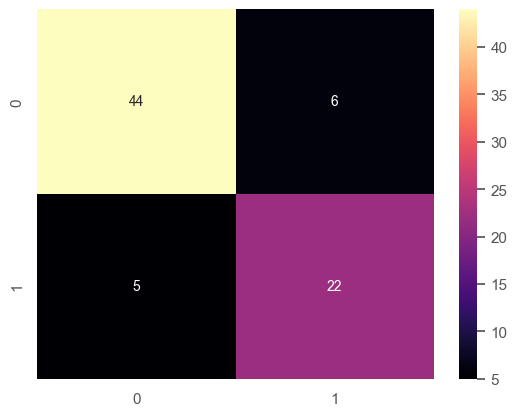

In [184]:
cm= confusion_matrix(y_test, y_predict_lg)
sns.heatmap(cm, annot= True, cmap= 'magma')

In [185]:
print(classification_report(y_test, y_predict_lg))

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89        50
         1.0       0.79      0.81      0.80        27

    accuracy                           0.86        77
   macro avg       0.84      0.85      0.84        77
weighted avg       0.86      0.86      0.86        77



K Nearest Neighbors

In [186]:
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [187]:
y_predict_knn= knn.predict(x_test)

In [188]:
knn_accuracy_score= accuracy_score(y_test, y_predict_knn)

In [189]:
print('train data accuracy score:', accuracy_score(y_train, knn.predict(x_train)))
print('test data accuracy score:', accuracy_score(y_test, y_predict_knn))

train data accuracy score: 0.8755426917510853
test data accuracy score: 0.8831168831168831


<Axes: >

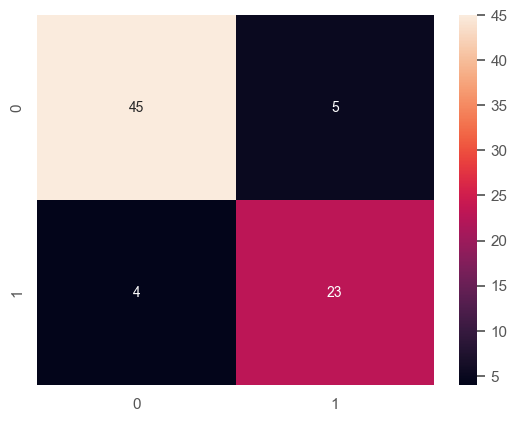

In [190]:
cm= confusion_matrix(y_test, y_predict_knn)
sns.heatmap(cm, annot= True)

In [191]:
print(classification_report(y_test, y_predict_knn))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91        50
         1.0       0.82      0.85      0.84        27

    accuracy                           0.88        77
   macro avg       0.87      0.88      0.87        77
weighted avg       0.88      0.88      0.88        77



Support Vector Classifier

In [192]:
svc= SVC(probability= True)
parameter= {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}
grid_search_svc= GridSearchCV(svc, parameter)
grid_search_svc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [193]:
grid_search_svc.best_params_

{'C': 10, 'gamma': 0.01}

In [194]:
grid_search_svc.best_score_

0.8595975393598165

In [195]:
svc= SVC(C= 10, gamma= 0.01, probability= True)
svc.fit(x_train, y_train)

SVC(C=10, gamma=0.01, probability=True)

In [196]:
y_predict_svc= svc.predict(x_test)

In [197]:
svc_accuracy_score= accuracy_score(y_test, y_predict_svc)

In [198]:
print('train data accuracy score:', accuracy_score(y_train, svc.predict(x_train)))
print('test data accuracy score:', accuracy_score(y_test, y_predict_svc))

train data accuracy score: 0.8596237337192475
test data accuracy score: 0.8441558441558441


<Axes: >

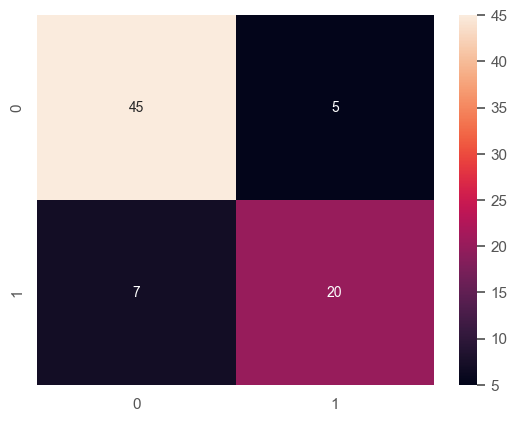

In [199]:
cm= confusion_matrix(y_test, y_predict_svc)
sns.heatmap(cm, annot= True)

In [200]:
print(classification_report(y_test, y_predict_svc))

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88        50
         1.0       0.80      0.74      0.77        27

    accuracy                           0.84        77
   macro avg       0.83      0.82      0.83        77
weighted avg       0.84      0.84      0.84        77



Decision Tree

In [201]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [202]:
y_predict_dt= dt.predict(x_test)

In [203]:
print('train data accuracy score:', accuracy_score(y_train, dt.predict(x_train)))
print('test data accuracy score:', accuracy_score(y_test, y_predict_dt))

train data accuracy score: 1.0
test data accuracy score: 0.9090909090909091


In [204]:
# here it is overfitting so lets do hyperparameter tuing

In [205]:
grid_parameters= {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 10, 12],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [2, 3, 5, 7, 9],
    'min_samples_split': [2, 3, 5, 7, 9],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search_dt= GridSearchCV(dt, grid_parameters, cv= 10, n_jobs= -1, verbose= 1)
grid_search_dt.fit(x_train, y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 10, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5, 7, 9],
                         'min_samples_split': [2, 3, 5, 7, 9],
                         'splitter': ['best', 'random']},
             verbose=1)

In [206]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'best'}

In [207]:
grid_search_dt.best_score_

0.8611387163561076

In [208]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       min_samples_leaf=7)

In [209]:
dt_accuracy_score= accuracy_score(y_test, y_predict_dt)

In [210]:
dt= grid_search_dt.best_estimator_
dt.fit(x_train, y_train)
y_predict_dt= dt.predict(x_test)
print('train data accuracy score:', accuracy_score(y_train, dt.predict(x_train)))
print('test data accuacy score:', accuracy_score(y_test, y_predict_dt))

train data accuracy score: 0.8726483357452967
test data accuacy score: 0.8311688311688312


<Axes: >

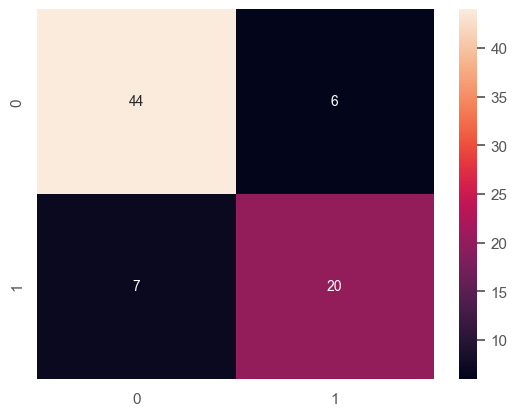

In [211]:
cm= confusion_matrix(y_test, y_predict_dt)
sns.heatmap(cm, annot= True)

In [212]:
print(classification_report(y_test, y_predict_dt))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87        50
         1.0       0.77      0.74      0.75        27

    accuracy                           0.83        77
   macro avg       0.82      0.81      0.81        77
weighted avg       0.83      0.83      0.83        77



Random Forest Classifier

In [213]:
rfc= RandomForestClassifier(criterion= 'entropy', max_depth= 17, max_features= 0.75, min_samples_leaf= 5, n_estimators= 100)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=17, max_features=0.75,
                       min_samples_leaf=5)

In [214]:
y_predict_rfc= rfc.predict(x_test)
rfc_accuracy_score= accuracy_score(y_test, y_predict_rfc)
print('train data accuracy score:', accuracy_score(y_train, rfc.predict(x_train)))
print('test data accuracy score:', accuracy_score(y_test, y_predict_rfc))

train data accuracy score: 0.9536903039073806
test data accuracy score: 0.9090909090909091


<Axes: >

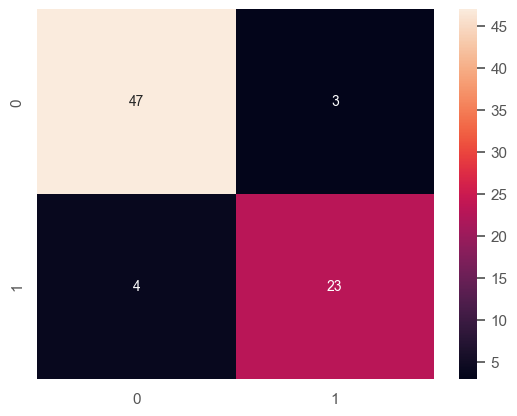

In [215]:
cm= confusion_matrix(y_test, y_predict_rfc)
sns.heatmap(cm, annot= True)

In [216]:
print(classification_report(y_test, y_predict_rfc))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        50
         1.0       0.88      0.85      0.87        27

    accuracy                           0.91        77
   macro avg       0.90      0.90      0.90        77
weighted avg       0.91      0.91      0.91        77



Gradient Boosting Classifier

In [217]:
gbc= GradientBoostingClassifier()
parameters= {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10, 15],
    'n_estimators': [100, 150, 170, 200]
}
grid_search_gbc= GridSearchCV(gbc, parameters, cv= 10, n_jobs= -1, verbose= 1)
grid_search_gbc.fit(x_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10, 15],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 170, 200]},
             verbose=1)

In [218]:
grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 200}

In [219]:
grid_search_gbc.best_score_

0.8900621118012424

In [220]:
gbc= GradientBoostingClassifier(learning_rate= 1, loss= 'exponential', n_estimators= 200)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=200)

In [221]:
y_predict_gbc= gbc.predict(x_test)
gbc_accuracy_score= accuracy_score(y_test, y_predict_gbc)
print('train data accuracy score:', accuracy_score(y_train, gbc.predict(x_train)))
print('test data accuracy score:', accuracy_score(y_test, y_predict_gbc))

train data accuracy score: 1.0
test data accuracy score: 0.9090909090909091


<Axes: >

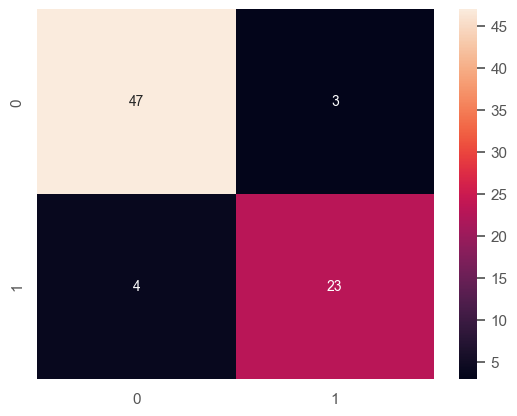

In [222]:
cm= confusion_matrix(y_test, y_predict_gbc)
sns.heatmap(cm, annot= True)

In [223]:
print(classification_report(y_test, y_predict_gbc))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        50
         1.0       0.88      0.85      0.87        27

    accuracy                           0.91        77
   macro avg       0.90      0.90      0.90        77
weighted avg       0.91      0.91      0.91        77



In [232]:
models_df= pd.DataFrame(
    {'models': ['logistic regression', 'knn', 'svc', 'decistion tree', 'gradient boost'], 
     'accuracy_score': [round(lg_accuracy_score, 4)*100, round(knn_accuracy_score, 4)*100, round(svc_accuracy_score, 4)*100, round(dt_accuracy_score, 4)*100, round(gbc_accuracy_score, 4)*100]
     }
)
models_df.sort_values(by= 'accuracy_score', ascending= False)

,models,accuracy_score
3,decistion tree,90.91
4,gradient boost,90.91
1,knn,88.31
0,logistic regression,85.71
2,svc,84.42
